# Project Title: Hotel Booking Cancellation Prediction Using Machine Learning



# Problem Statement:

The hospitality industry faces a significant challenge in managing hotel bookings due to last-minute cancellations, leading to revenue losses and inefficient resource utilization. The goal of this project is to develop a machine learning model that accurately predicts whether a hotel booking will be canceled or not, based on key factors such as lead time, customer type, deposit type, previous cancellations, and booking details.

# Step 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 2: Load the Dataset

In [ ]:
#Step 2: Load and Clean Dataset
df = pd.read_csv('hotel_bookings.csv')

# Step 3: Display Dataset Information

In [ ]:
# Display first and last five rows
print("First 5 Rows:")
display(df.head())

First 5 Rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
print("Last 5 Rows:")
display(df.tail())

Last 5 Rows:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
display(df.shape)

(119390, 32)

# Step 4: Check for Missing Values

In [ ]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340


# Step 5: Display Data Types & Statistics

In [ ]:
# Data types of columns
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent          

In [ ]:
# Five-number summary
print("Five-number Summary:")
display(df.describe())

Five-number Summary:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Step 6: Defining Features (X) and Target (y)

In [ ]:
# Strip column names to remove hidden spaces
df.columns = df.columns.str.strip()

In [ ]:
# Define Features (X) and Target (y)
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [ ]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 7: Handling Missing Values

In [ ]:
# Handle missing values
num_imputer = SimpleImputer(strategy='mean')  # Replace NaNs in numeric columns with mean
cat_imputer = SimpleImputer(strategy='most_frequent')  # Replace NaNs in categorical columns with mode

In [ ]:
X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# Step 8: Preprocessing - Encoding & Scaling

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),  # Scale numerical features
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  # Encode categorical features
])

In [ ]:
# Apply transformations
X = preprocessor.fit_transform(X)

# Step 9: Split Data into Training and Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 10: Data Visualizations

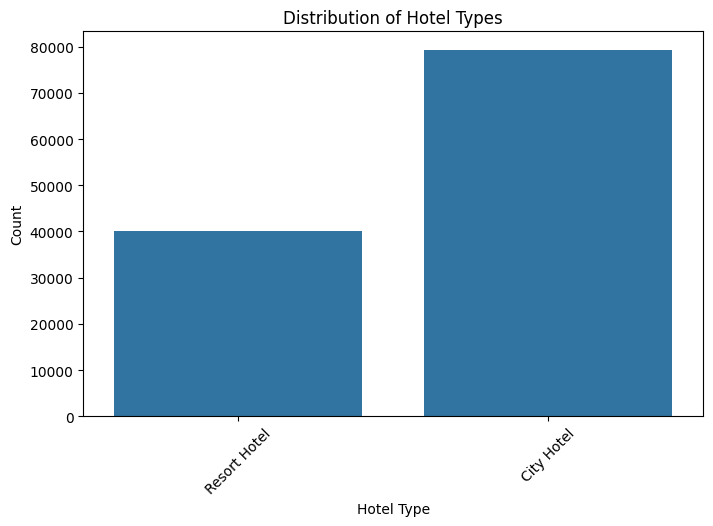

In [ ]:
# Bar Chart - Hotel Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="hotel")
plt.title("Distribution of Hotel Types")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

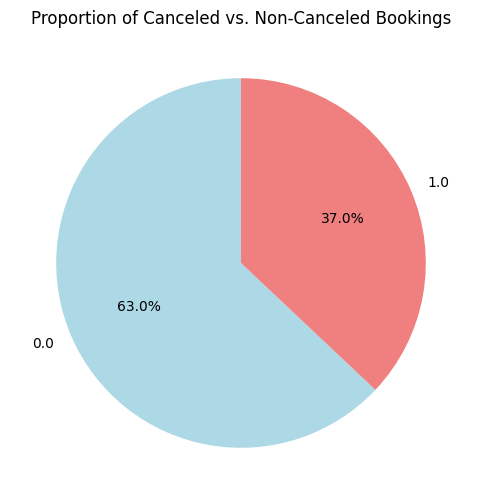

In [ ]:
#Pie Chart - Cancellations vs. Non-Cancellations
plt.figure(figsize=(6, 6))
df['is_canceled'].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "lightcoral"], startangle=90)
plt.title("Proportion of Canceled vs. Non-Canceled Bookings")
plt.ylabel("")  # Hide the y-label
plt.show()

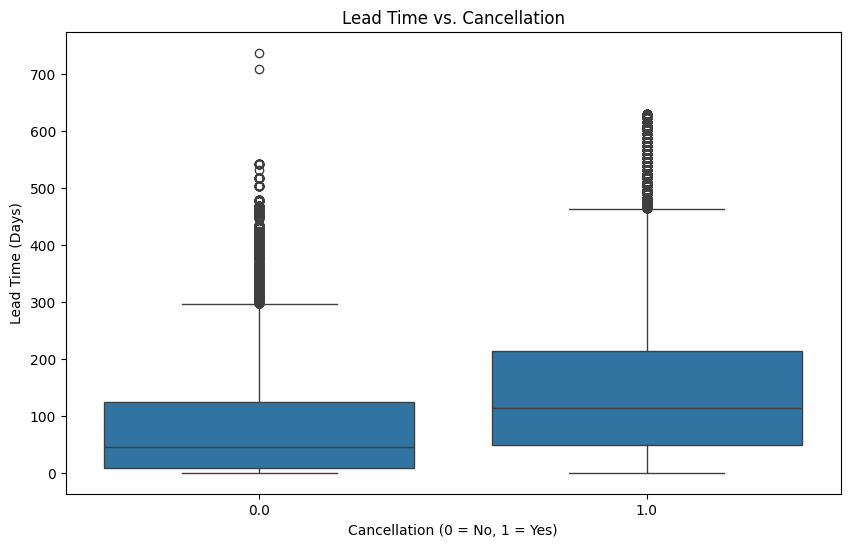

In [ ]:
#Box Plot - Lead Time vs. Cancellations
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("Lead Time vs. Cancellation")
plt.xlabel("Cancellation (0 = No, 1 = Yes)")
plt.ylabel("Lead Time (Days)")
plt.show()

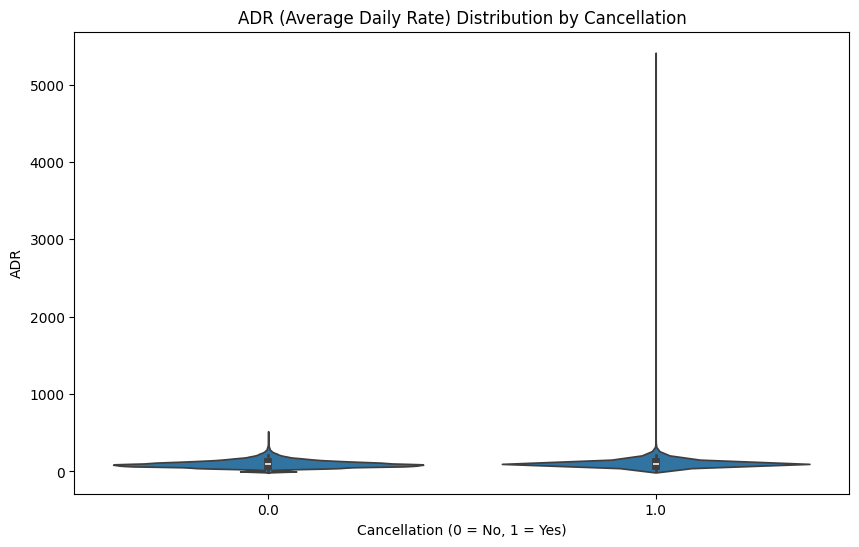

In [ ]:
# Violin Plot - ADR Distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_canceled', y='adr', data=df)
plt.title("ADR (Average Daily Rate) Distribution by Cancellation")
plt.xlabel("Cancellation (0 = No, 1 = Yes)")
plt.ylabel("ADR")
plt.show()

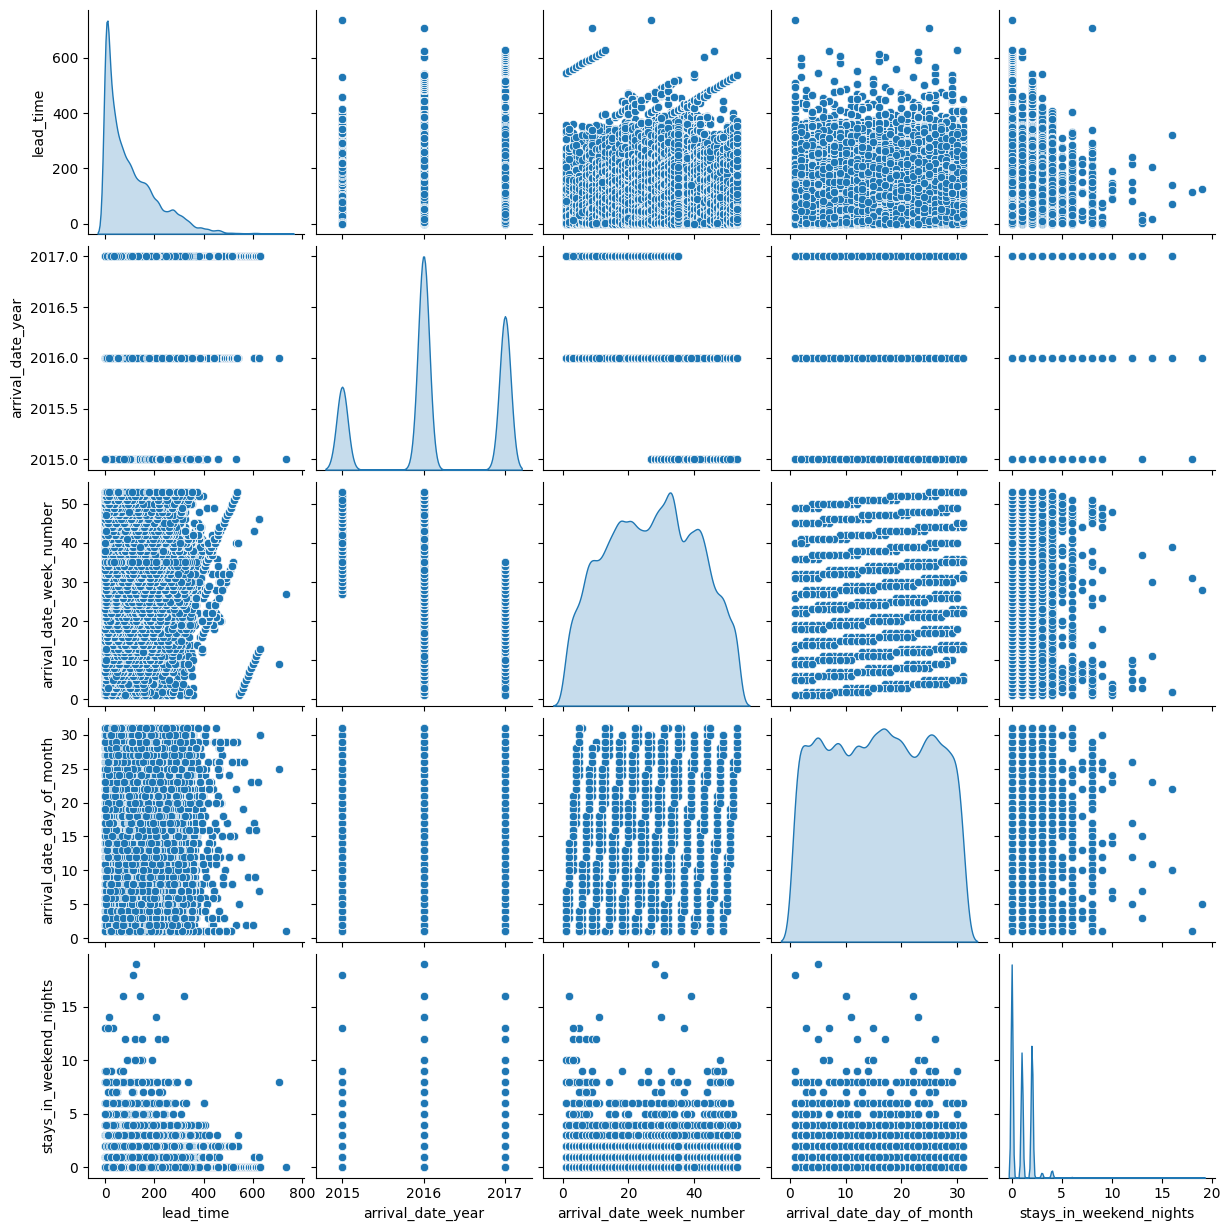

In [ ]:
#Pair Plot - Relationship Between Features (Limited to First 5 Numeric Columns)
sns.pairplot(df[num_cols].iloc[:, :5].dropna(), diag_kind="kde")
plt.show()

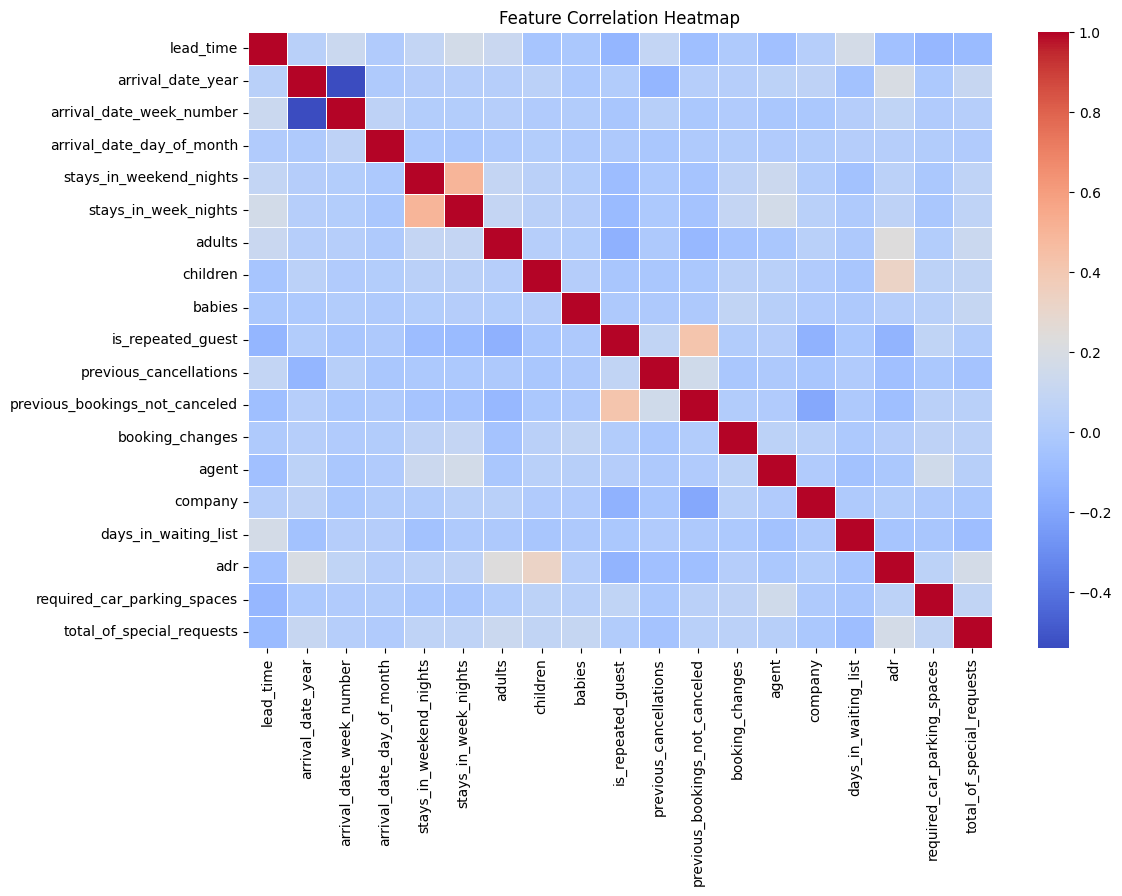

In [ ]:
#Heatmap - Correlation Between Features
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

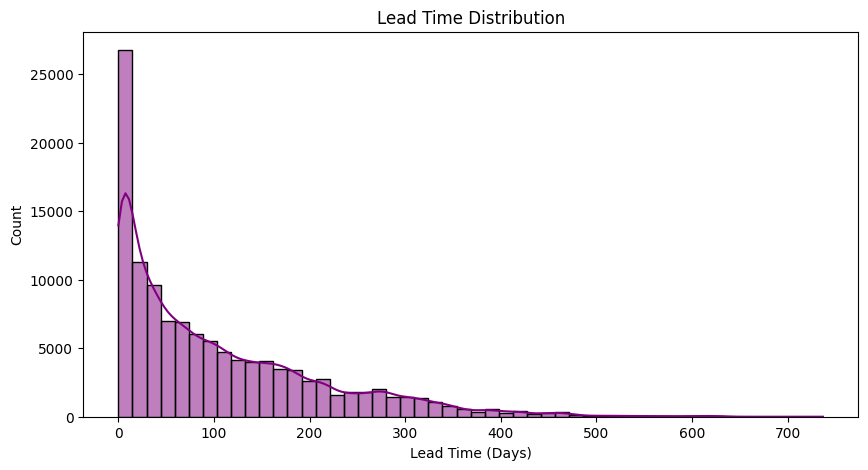

In [ ]:
#Histogram - Lead Time Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['lead_time'], bins=50, kde=True, color="purple")
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Count")
plt.show()

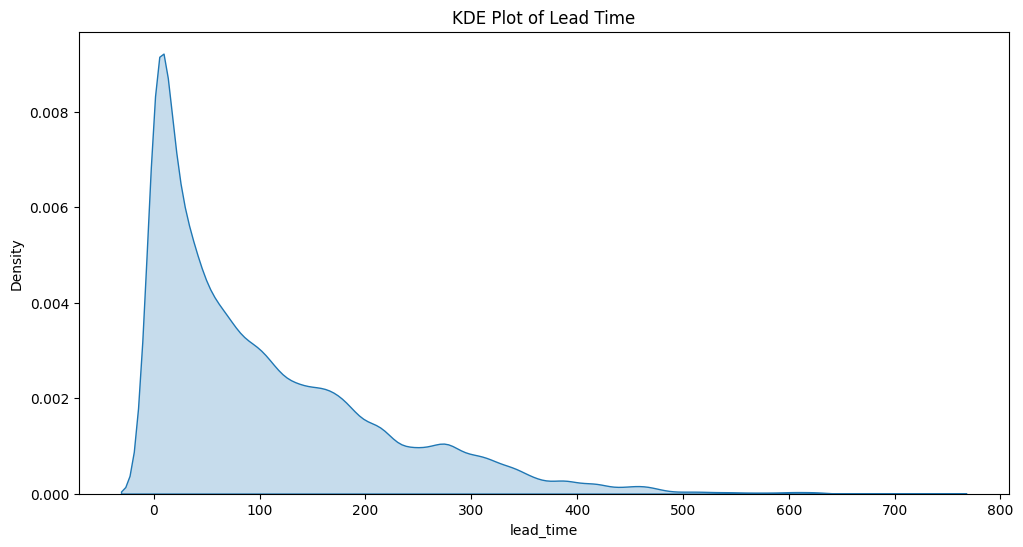

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['lead_time'], fill=True)
plt.title("KDE Plot of Lead Time")
plt.show()

# Step 11: Train and Evaluate Classification Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}


🔹 Logistic Regression Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22478
         1.0       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



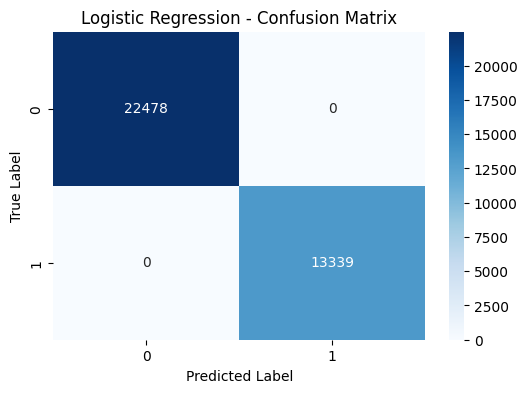


🔹 Decision Tree Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22478
         1.0       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



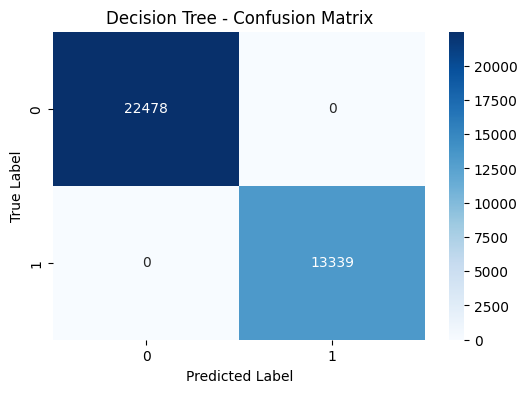


🔹 Random Forest Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22478
         1.0       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



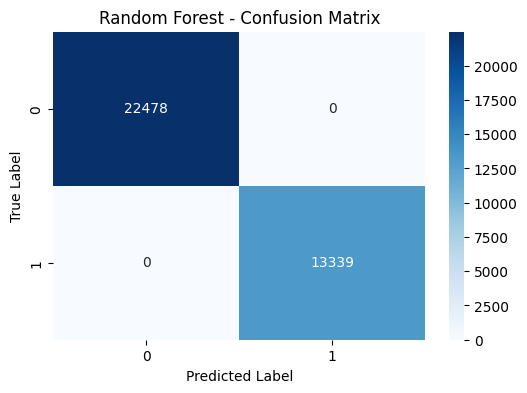


🔹 Support Vector Machine Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22478
         1.0       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



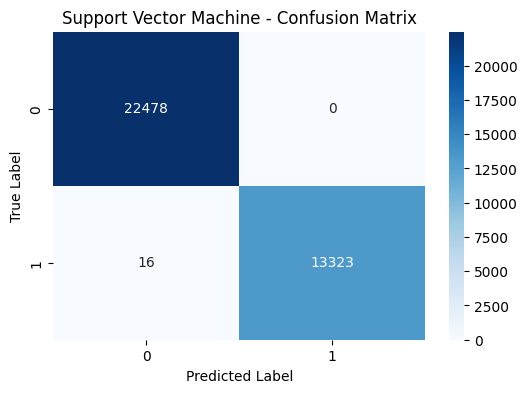

In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"\n🔹 {name} Model Performance:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\nClassification Model Results:\n", results_df)


Classification Model Results:
                     Model  Accuracy  Precision  Recall  F1 Score
0     Logistic Regression  1.000000   1.000000  1.0000  1.000000
1           Decision Tree  1.000000   1.000000  1.0000  1.000000
2           Random Forest  1.000000   1.000000  1.0000  1.000000
3  Support Vector Machine  0.999553   0.999644  0.9994  0.999522


#Step 12: Train and Evaluate Ensemble Models

In [ ]:
ensemble_models = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier()),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Stacking": StackingClassifier(estimators=[("rf", RandomForestClassifier()), ("svm", SVC())], final_estimator=LogisticRegression())
}


🔹 Bagging Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22478
         1.0       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



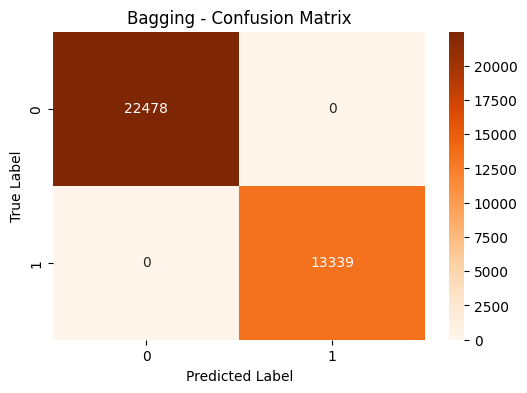


🔹 Gradient Boosting Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22478
         1.0       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



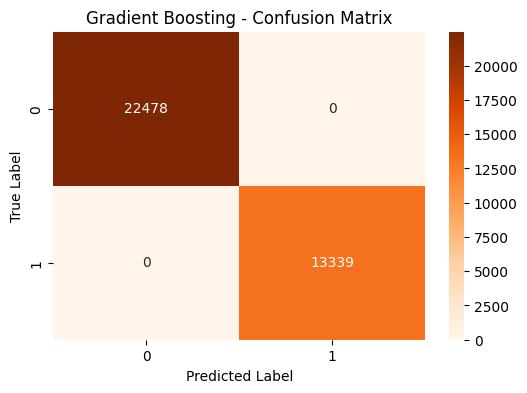


🔹 AdaBoost Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22478
         1.0       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



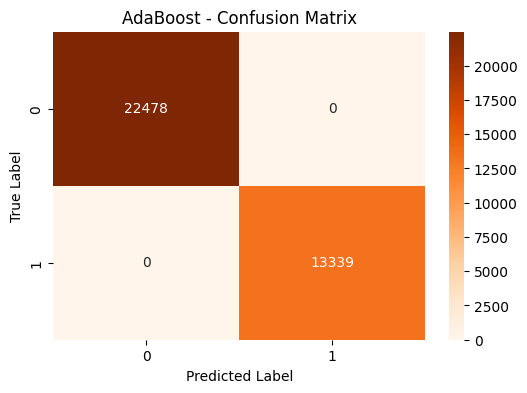


🔹 Stacking Model Performance:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22478
         1.0       1.00      1.00      1.00     13339

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817



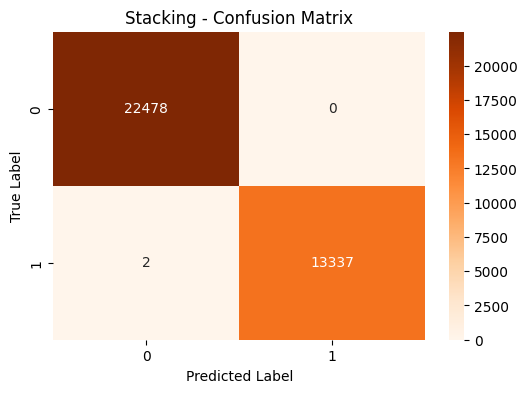


🎯 Ensemble Model Results:
       Ensemble Model  Accuracy  Precision    Recall  F1 Score
0            Bagging  1.000000   1.000000  1.000000   1.00000
1  Gradient Boosting  1.000000   1.000000  1.000000   1.00000
2           AdaBoost  1.000000   1.000000  1.000000   1.00000
3           Stacking  0.999944   0.999956  0.999925   0.99994


In [ ]:
ensemble_results = []
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    ensemble_results.append([name, acc, prec, rec, f1])

    print(f"\n🔹 {name} Model Performance:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

ensemble_results_df = pd.DataFrame(ensemble_results, columns=["Ensemble Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n Ensemble Model Results:\n", ensemble_results_df)

# Step 13: Identify Best Model

In [ ]:
best_model = results_df.sort_values(by="Accuracy", ascending=False).iloc[0, 0]
best_ensemble = ensemble_results_df.sort_values(by="Accuracy", ascending=False).iloc[0, 0]

print(f"\nBest Individual Model: {best_model}")
print(f"Best Ensemble Model: {best_ensemble}")


Best Individual Model: Logistic Regression
Best Ensemble Model: Bagging
